In [74]:
inp = """..#
#..
..."""

In [105]:
with open('data/input_22.txt') as fh:
    inp = fh.read().strip()

In [106]:
lines = inp.split('\n')
dim = len(lines)
offset = dim // 2

In [ ]:
def next_pos(pos, direction):
    if direction == 0:
        return (pos[0], pos[1] - 1)
    elif direction == 1:
        return (pos[0] + 1, pos[1])
    elif direction == 2:
        return (pos[0], pos[1] + 1)
    elif direction == 3:
        return (pos[0] - 1, pos[1])
    
def turn(where, direction):
    direction = direction + 1 if where == 'r' else direction - 1
    return direction % 4

In [68]:
# part 1
infected = {(x-offset, y-offset) for x in range(dim) for y in range(dim) if lines[y][x] == '#'}
pos = (0, 0)
direction = 0
n = 10000
infections = 0
for i in range(n):
    if pos in infected:
        direction = turn('r', direction)
        infected.remove(pos)
    else:
        direction = turn('l', direction)
        infected.add(pos)
        infections += 1
    pos = next_pos(pos, direction)
print('infections: ', infections)

infections:  5182


In [58]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
plt.rcParams['figure.figsize'] = (8, 8)

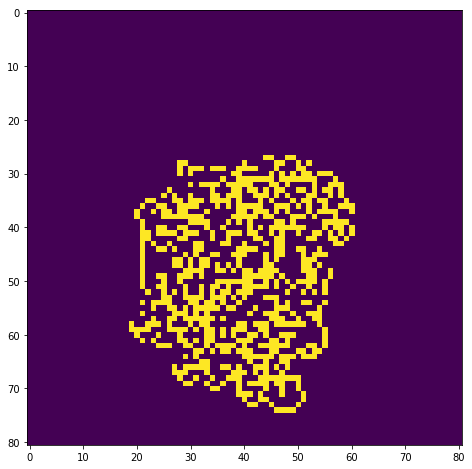

In [70]:
grid_dim = 80
grid_dim = grid_dim + 1
off = grid_dim // 2
grid = np.zeros((grid_dim, grid_dim))
for p in infected:
    try:
        grid[p[0]+off, p[1]+off] = 1
    except IndexError:
        pass

plt.imshow(grid.T)

In [95]:
def draw(grid_dim, infected, weakened, flagged):
    off = grid_dim // 2
    grid = np.zeros((grid_dim, grid_dim))
    for p in infected:
        try:
            grid[p[0]+off, p[1]+off] = 30
        except IndexError:
            pass
    for p in weakened:
        try:
            grid[p[0]+off, p[1]+off] = 20
        except IndexError:
            pass
    for p in flagged:
        try:
            grid[p[0]+off, p[1]+off] = 10
        except IndexError:
            pass

    plt.imshow(grid.T)

infections:  2465


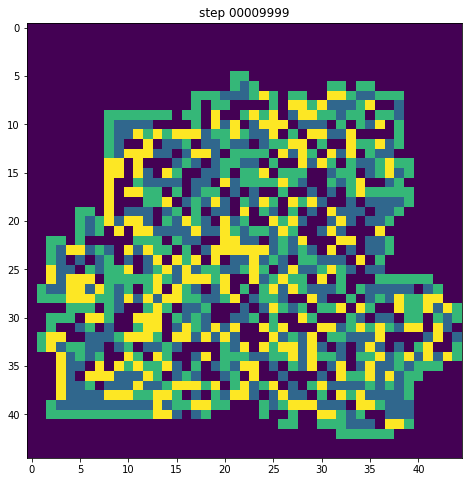

In [138]:
# part 2
infected = {(x-offset, y-offset) for x in range(dim) for y in range(dim) if lines[y][x] == '#'}
weakened = set()
flagged = set()

pos = (0, 0)
direction = 0
n = 10000000
n = 10000
infections = 0
pic_num = 0
for i in range(n):
    if pos in infected:
        direction = turn('r', direction)
        infected.remove(pos)
        flagged.add(pos)
    elif pos in weakened:        
        weakened.remove(pos)
        infected.add(pos)
        infections += 1
    elif pos in flagged:
        direction = (direction + 2) % 4
        flagged.remove(pos)        
    else:        
        direction = turn('l', direction)
        weakened.add(pos)
    if (i % 10) == 0:
        draw(45, infected, weakened, flagged)
        plt.title('step {:08}'.format(i))
        plt.savefig('tmp/pic_{:04}.png'.format(pic_num))
        pic_num += 1
                
    pos = next_pos(pos, direction)
draw(45, infected, weakened, flagged)
plt.title('step {:08}'.format(i))
print('infections: ', infections)

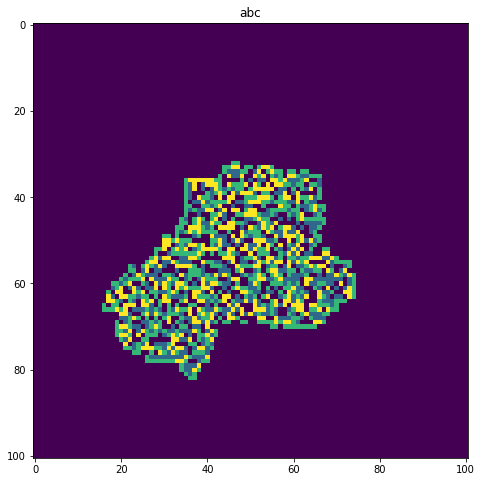

In [135]:
draw(101, infected, weakened, flagged)
plt.title('abc')
